In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
from pyvis.physics import Physics
import chess
import json
import re

In [99]:
df = pd.read_csv("all_games.csv")
print(df['Result'].value_counts())
df.head()

1-0        2287
0-1        2192
1/2-1/2     255
Name: Result, dtype: int64


,Unnamed: 0.1,Unnamed: 0,Date,Round,White,Black,Result,ECO,ECOUrl,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndTime,Moves
0,0,0,2023.08.24,-,zalabesohat,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,670,689,300,yolodudewhat,18:34:25,18:36:54,1. e4 d5 2. exd5 Qxd5 3. Nf3 Qe6+ 4. Be2 Q...
1,1,1,2023.08.24,-,Prempandey67,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,580,703,300,yolodudewhat,18:45:33,18:55:22,1. e4 d5 2. e5 d4 3. Qh5 e6 4. c3 g6 5. Qf...
2,2,2,2023.08.25,-,bboeker,yolodudewhat,1-0,B01,https://www.chess.com/openings/Scandinavian-De...,764,701,300,bboeker,01:08:47,01:14:24,1. e4 d5 2. exd5 Qxd5 3. d4 Qe6+ 4. Qe2 Qb...
3,3,3,2023.08.25,-,sevag777,yolodudewhat,0-1,A01,https://www.chess.com/openings/Nimzowitsch-Lar...,694,720,300,yolodudewhat,03:50:28,03:56:59,1. b3 d5 2. Bb2 a5 3. e3 e6 4. Bb5+ c6 5. ...
4,4,4,2023.08.25,-,walker086,yolodudewhat,0-1,A40,https://www.chess.com/openings/Englund-Gambit-...,732,729,300,yolodudewhat,17:51:26,17:56:38,1. d4 e5 2. dxe5 d5 3. Nf3 d4 4. Nxd4 Qh4 ...


0       1. e4  d5 2. exd5  Qxd5 3. Nf3  Qe6+ 4. Be2  Q...
1       1. e4  d5 2. e5  d4 3. Qh5  e6 4. c3  g6 5. Qf...
2       1. e4  d5 2. exd5  Qxd5 3. d4  Qe6+ 4. Qe2  Qb...
3       1. b3  d5 2. Bb2  a5 3. e3  e6 4. Bb5+  c6 5. ...
4       1. d4  e5 2. dxe5  d5 3. Nf3  d4 4. Nxd4  Qh4 ...
                              ...                        
4729    1. g3  f5 2. Bh3  e6 3. c3  Nc6 4. b3  a6 5. N...
4730    1. b3  b5 2. g4  b4 3. c3  g5 4. cxb4  e5 5. N...
4731    1. g3  Nf6 2. b3  g5 3. c4  g4 4. h3  h5 5. f3...
4732    1. g4  Nc6 2. f3  g6 3. Nh3  Nh6 4. Nf4  b6 5....
4733    1. g3  d5 2. Bg2  e5 3. e3  Be6 4. d3  Nf6 5. ...
Name: Moves, Length: 4734, dtype: object


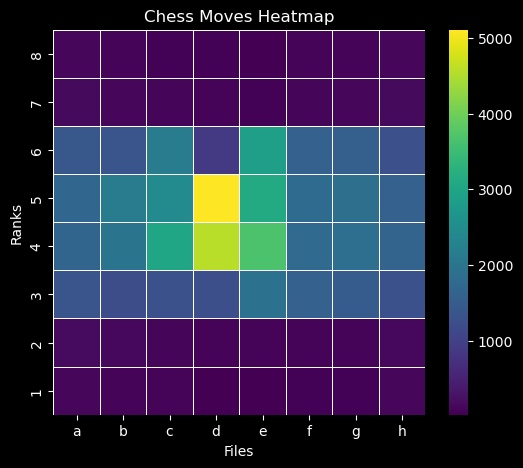

In [94]:
# Initializing the chessboard (8x8) with zeroes
board = np.zeros((8, 8))
print(df['Moves'])

# Converting algebraic notation to board matrix indices
def alg_to_idx(move):
    col_dict = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    
    # Checking if the move is a valid algebraic notation (e.g., e2)
    if len(move) < 2:
        return None
    col = move[0]
    row = move[1]
    if col in col_dict and row.isdigit() and 1 <= int(row) <= 8:
        return (8 - int(row), col_dict[col])
    return None


# Parsing game's moves
for moves in df['Moves']:
    # Split moves and iterate over them
    for move in moves.split():
        # Ignore move numbers (like "1.", "2.", etc.)
        if '.' not in move:
            idx = alg_to_idx(move)
            if idx:
                board[idx] += 1

plt.style.use('dark_background')

# Displaying heatmap using seaborn with a dark colormap
plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='viridis', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("Chess Moves Heatmap", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [4]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Round,White,Black,Result,ECO,ECOUrl,WhiteElo,BlackElo,TimeControl,Termination,Moves
4593,4593,2357,2020.06.27,-,yolodudewhat,akhikhare,1-0,A00,https://www.chess.com/openings/Kings-Fianchett...,290,213,600,yolodudewhat,1. g3 f5 2. Bh3 e6 3. c3 Nc6 4. b3 a6 5. N...
4594,4594,2358,2020.06.27,-,yolodudewhat,embarrassing500,1/2-1/2,A01,https://www.chess.com/openings/Nimzowitsch-Lar...,275,148,600,Game,1. b3 b5 2. g4 b4 3. c3 g5 4. cxb4 e5 5. N...
4595,4595,2359,2020.06.27,-,yolodudewhat,Yash862,0-1,A00,https://www.chess.com/openings/Kings-Fianchett...,241,291,600,Yash862,1. g3 Nf6 2. b3 g5 3. c4 g4 4. h3 h5 5. f3...
4596,4596,2360,2020.06.27,-,yolodudewhat,khanwakkas,1-0,A00,https://www.chess.com/openings/Grob-Opening,279,302,600,yolodudewhat,1. g4 Nc6 2. f3 g6 3. Nh3 Nh6 4. Nf4 b6 5....
4597,4597,2361,2020.06.27,-,yolodudewhat,3checkmaster1111,0-1,A00,https://www.chess.com/openings/Kings-Fianchett...,249,342,600,3checkmaster1111,1. g3 d5 2. Bg2 e5 3. e3 Be6 4. d3 Nf6 5. ...


In [5]:
print(len(df))

4598


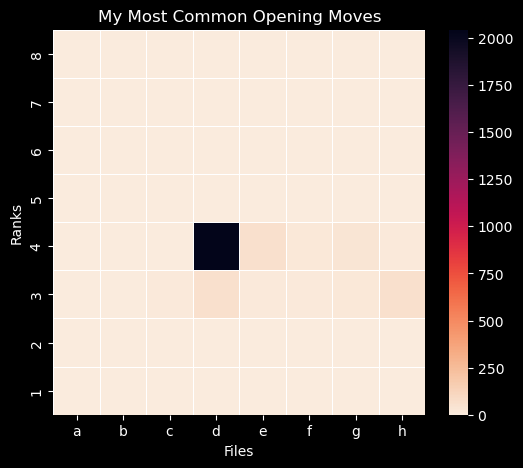

In [84]:
# Filtering the DataFrame for games where {userrname} played as black
yolo_white_games = df[df['White'] == '{userrname}']
# print(yolo_white_games)

# Extracting the first move (white's move) that comes after "1." for each game
my_first_move = []

for moves in yolo_white_games['Moves']:
    # Splitting by space and take the move immediately after "1."
    move_list = moves.split()
    if len(move_list) > 1:  # Ensuring there's at least one move recorded
        my_first_move.append(move_list[1])
        
board = np.zeros((8, 8))
for move in my_first_move:
    idx = alg_to_idx(move)  # alg_to_idx function 
    if idx:
        board[idx] += 1

# Setting the dark theme aesthetics
plt.style.use('dark_background')

plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("My Most Common Opening Moves", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

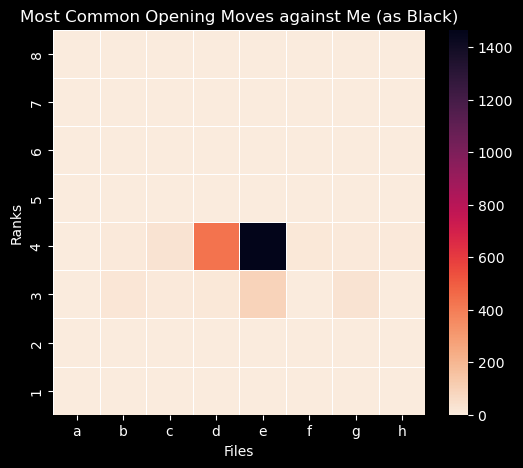

In [7]:
# Filtering the DataFrame for games where {userrname} played as black
yolo_black_games = df[df['Black'] == '{userrname}']


# Extracting the first move (white's move) that comes after "1." for each game
opponents_first_move = []

for moves in yolo_black_games['Moves']:
    # Splitting by space and take the move immediately after "1."
    move_list = moves.split()
    if len(move_list) > 1:  # Ensuring there's at least one move recorded
        opponents_first_move.append(move_list[1])
        

board = np.zeros((8, 8))
for move in opponents_first_move:
    idx = alg_to_idx(move)  # alg_to_idx function 
    if idx:
        board[idx] += 1

    
plt.style.use('dark_background')

plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("Most Common Opening Moves against Me (as Black)", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

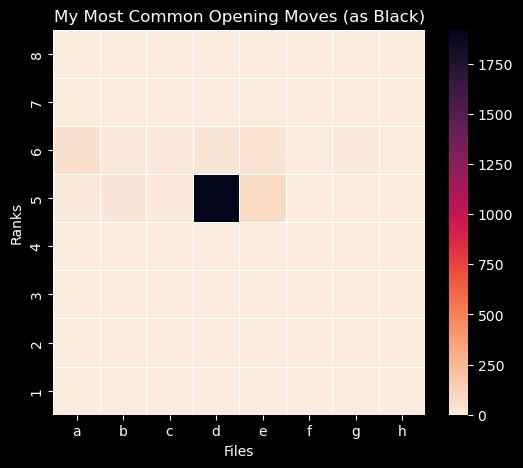

In [8]:
# Filtering the DataFrame for games where i played as black
yolo_black_games = df[df['Black'] == '{userrname}']

# Extractting the first move for black (i.e., the second move after "1.") 
black_moves = []

for moves in yolo_black_games['Moves']:
    # Splitting by space and take the second move after "1."
    move_list = moves.split()
    if len(move_list) > 2:  # Ensuring there are at least two moves recorded
        black_moves.append(move_list[2])
        

board = np.zeros((8, 8))
for move in black_moves:
    idx = alg_to_idx(move)  # alg_to_idx function 
    if idx:
        board[idx] += 1

plt.style.use('dark_background')

plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("My Most Common Opening Moves (as Black)", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

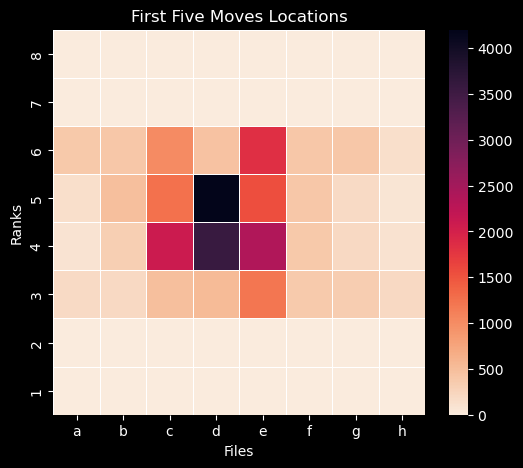

In [85]:
# Extracting the first five moves for both players
five_moves_list = []

for moves in df['Moves']:
    split_moves = moves.split()
    i = 0
    k = 0
    while i + 2 < len(split_moves) and k < 5:
        five_moves_list.append(split_moves[i + 1])
        five_moves_list.append(split_moves[i + 2])
        i += 3
        k += 1
# print(five_moves_list)

board = np.zeros((8, 8))

for move in five_moves_list:
    idx = alg_to_idx(move)
    if idx:
        board[idx] += 1

plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("First Five Moves Locations", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [10]:
# Where does the end game take place?
last_moves_list = []
print(df['Moves'][0])


1. e4  d5 2. exd5  Qxd5 3. Nf3  Qe6+ 4. Be2  Qg6 5. Rg1  Bf5 6. d4  Bxc2 7. Qd2  e6 8. Nc3  a5 9. Ne5  Qf5 10. Bd3  Bxd3 11. Nxd3  c6 12. Qe2  b5 13. Be3  b4 14. Nb5  Na6 15. Nd6+ 0-1


In [86]:
def reverse_moves(moves_str):
    # Removing the result (e.g., "1-0", "0-1", "1/2-1/2") from the end if it exists.
    for result in ["1-0", "0-1", "1/2-1/2"]:
        if moves_str.endswith(result):
            moves_str = moves_str[:-len(result)].strip()

    # Splitting by spaces to get each individual move
    moves_list = moves_str.split()

    # Removing the move numbers (like "1.", "2.", ... etc.)
    moves_list = [move for move in moves_list if not move.endswith('.')]
    
    # Grouping moves into pairs
    moves_pairs = list(zip(moves_list[::2], moves_list[1::2]))

    # In case of an odd number of moves where black didn't get to play the last move
    if len(moves_list) % 2 != 0:
        moves_pairs.append((moves_list[-1],))

    # Reversing the list of paired moves
    reversed_moves_pairs = moves_pairs[::-1]
    reversed_moves_str = ' '.join([' '.join(pair) for pair in reversed_moves_pairs])
    
    return reversed_moves_str

In [87]:
df['ReversedMoves'] = df['Moves'].apply(reverse_moves)

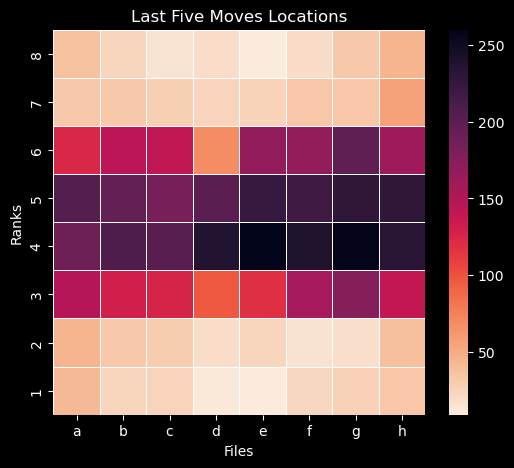

In [88]:
last_moves_list = []

for moves in df['ReversedMoves']:
    last_moves = moves.split()
    i = 0
    k = 0
    while i + 2 < len(last_moves) and k < 5:
        last_moves_list.append(last_moves[i + 1])
        last_moves_list.append(last_moves[i + 2])
        i += 3
        k += 1
        
# Creating a board to store the frequency of each move
board = np.zeros((8, 8))

for move in last_moves_list:
    idx = alg_to_idx(move)
    if idx:
        board[idx] += 1

# Displaying heatmap 
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("Last Five Moves Locations", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

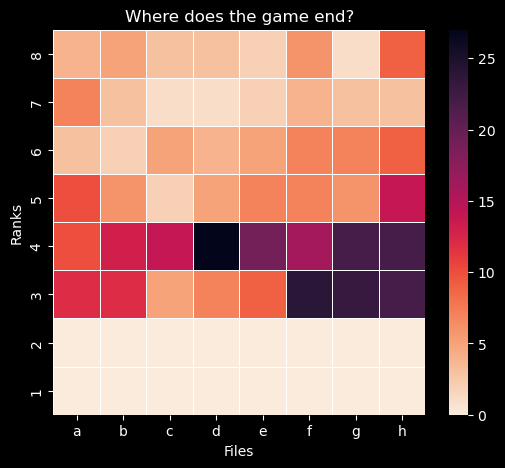

In [97]:
# Extracting the first move from the reversed moves
end_game = df['ReversedMoves'].apply(lambda moves: moves.split()[0] if moves and not pd.isna(moves) else moves)

board = np.zeros((8, 8))
# Updating the frequency for the extracted move positions
for moving in end_game:
    idx = alg_to_idx(moving)   
    if idx:
        board[idx] += 1
        
# Displaying heatmap using seaborn
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
sns.heatmap(board, cmap='rocket_r', annot=False, cbar=True, xticklabels=list('abcdefgh'), yticklabels=list('87654321'), linewidths=.5, linecolor='white')
plt.title("Where does the game end?", color='white')
plt.xlabel("Files", color='white')
plt.ylabel("Ranks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Average number of moves: 31.73


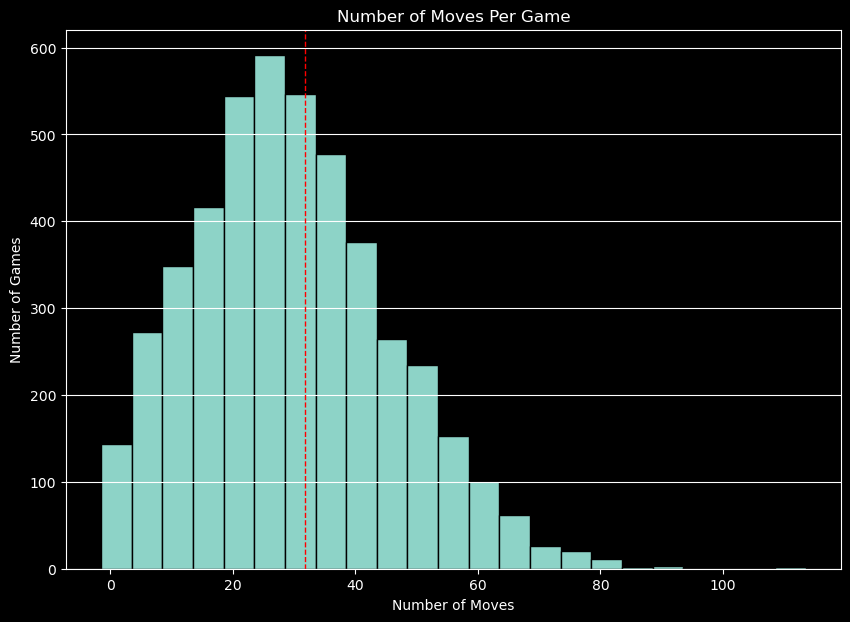

In [15]:
# Using regex to count full move numbers like '1.', '2.', etc.
df['Move_Count'] = df['Moves'].str.count(r'\d+\.')

# Filter out rows where Move_Count is 0
df = df[df['Move_Count'] > 0]

# Calculating the average number of moves
average_moves = df['Move_Count'].mean()
print(f"Average number of moves: {average_moves:.2f}")

# Plotting the Histogram
plt.figure(figsize=(10, 7))
bins = range(1, int(df['Move_Count'].max()) + 5, 5)  # Creating bins starting from 1
plt.hist(df['Move_Count'], bins=bins, edgecolor='black', align='left')
plt.axvline(average_moves, color='red', linestyle='dashed', linewidth=1)  # Add average line
plt.xlabel('Number of Moves')
plt.ylabel('Number of Games')
plt.title('Number of Moves Per Game')
plt.grid(axis='y')

plt.show()

/var/folders/82/rq9sgxp93s759b_q7pb_bztr0000gn/T/ipykernel_61543/1129894973.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['SelectedElo'] = df.loc[condition, 'WhiteElo'].append(df.loc[~condition, 'BlackElo']).astype(int)


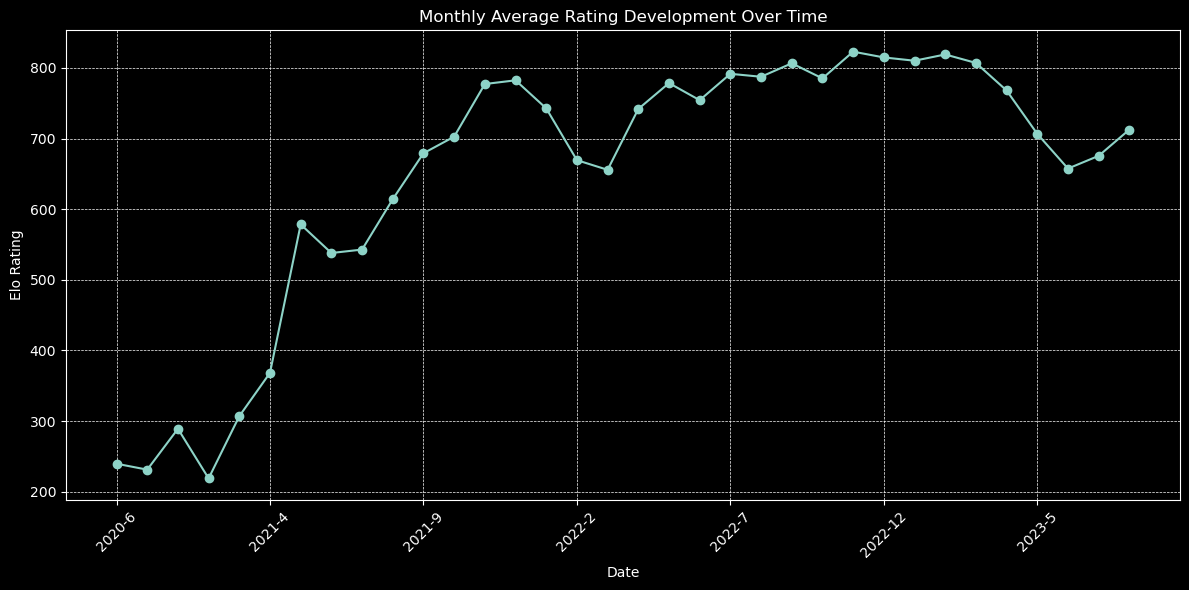

In [16]:
condition = (df['White'] == '{userrname}')
df['SelectedElo'] = df.loc[condition, 'WhiteElo'].append(df.loc[~condition, 'BlackElo']).astype(int)
df['SelectedDate'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format

# Aggregating the data on a monthly basis
df_monthly = df.groupby([df['SelectedDate'].dt.year, df['SelectedDate'].dt.month])['SelectedElo'].mean()
df_monthly.index = [f"{year}-{month}" for year, month in df_monthly.index]

# Plotting
plt.figure(figsize=(12,6))
df_monthly.plot(marker='o', linestyle='-')
plt.title('Monthly Average Rating Development Over Time')
plt.xlabel('Date')
plt.ylabel('Elo Rating')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [17]:
# finding loss, wins, and draw:
# if "{userrname}" in white, look for "1-0" in result and add to wins, if not in wins add to loss, else look for "0-1"
# in result

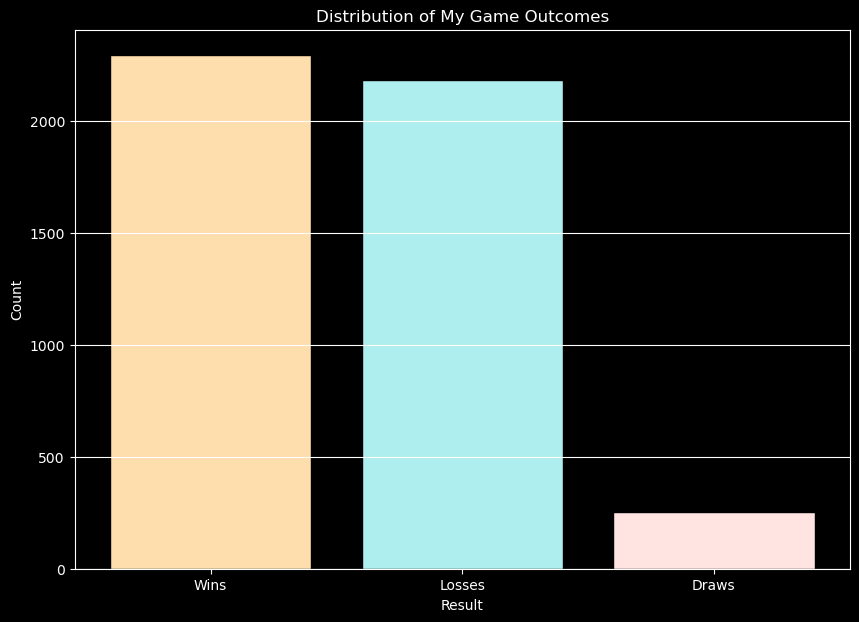

In [103]:
wins = len(df[((df['White'] == "{username}") & (df['Result'] == '1-0')) | 
                      ((df['Black'] == "{username}") & (df['Result'] == '0-1'))])

losses = len(df[((df['White'] == "{username}") & (df['Result'] == '0-1')) | 
                        ((df['Black'] == "{username}") & (df['Result'] == '1-0'))])

draws = len(df[df['Result'] == '1/2-1/2'])

labels = ['Wins', 'Losses', 'Draws']
values = [wins, losses, draws]

plt.figure(figsize=(10, 7))
plt.bar(labels, values, color=['navajowhite', 'paleturquoise', 'mistyrose'], edgecolor='black')
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of My Game Outcomes')
plt.grid(axis='y')

plt.show()

In [38]:
# For white games
white_wins = len(df[(df['White'] == "{userrname}") & (df['Result'] == '1-0')])
white_losses = len(df[(df['White'] == "{userrname}") & (df['Result'] == '0-1')])
white_draws = len(df[(df['White'] == "{userrname}") & (df['Result'] == '1/2-1/2')])

# For balck games
black_wins = len(df[(df['Black'] == "{userrname}") & (df['Result'] == '0-1')])
black_losses = len(df[(df['Black'] == "{userrname}") & (df['Result'] == '1-0')])
black_draws = len(df[(df['Black'] == "{userrname}") & (df['Result'] == '1/2-1/2')])

print(white_wins, white_losses, white_draws, black_wins, black_losses, black_draws)

1173 1070 119 1122 1114 0


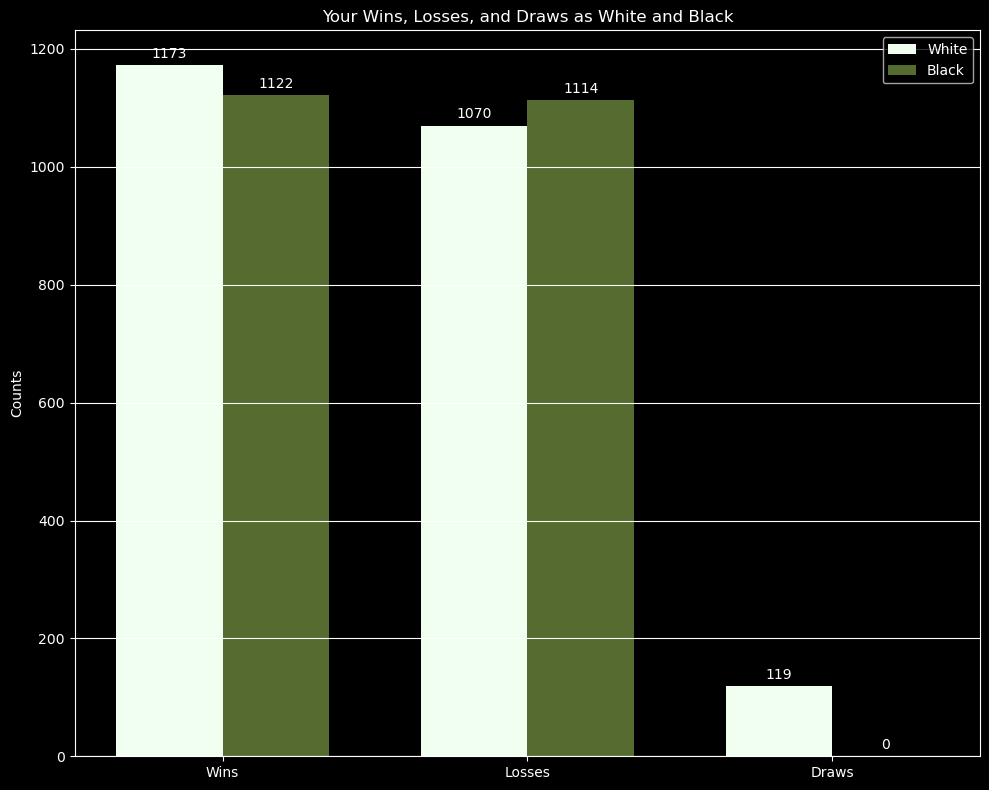

In [44]:
labels = ['Wins', 'Losses', 'Draws']
white_values = [white_wins, white_losses, white_draws]
black_values = [black_wins, black_losses, black_draws]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10, 8))
rects1 = plt.bar(x - width/2, white_values, width, label='White', color='honeydew')
rects2 = plt.bar(x + width/2, black_values, width, label='Black', color='darkolivegreen')

# Adding text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Counts')
plt.title('Your Wins, Losses, and Draws as White and Black')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')

# Auto label function to display counts on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [62]:
print(df.columns)

Index(['Date', 'Round', 'White', 'Black', 'Result', 'ECO', 'ECOUrl',
       'WhiteElo', 'BlackElo', 'TimeControl', 'Termination', 'StartTime',
       'EndTime', 'Moves'],
      dtype='object')


In [63]:
# performance on hour of the day
df.head()

,Date,Round,White,Black,Result,ECO,ECOUrl,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndTime,Moves
0,2023.08.24,-,zalabesohat,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,670,689,300,yolodudewhat,18:34:25,18:36:54,1. e4 d5 2. exd5 Qxd5 3. Nf3 Qe6+ 4. Be2 Q...
1,2023.08.24,-,Prempandey67,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,580,703,300,yolodudewhat,18:45:33,18:55:22,1. e4 d5 2. e5 d4 3. Qh5 e6 4. c3 g6 5. Qf...
2,2023.08.25,-,bboeker,yolodudewhat,1-0,B01,https://www.chess.com/openings/Scandinavian-De...,764,701,300,bboeker,01:08:47,01:14:24,1. e4 d5 2. exd5 Qxd5 3. d4 Qe6+ 4. Qe2 Qb...
3,2023.08.25,-,sevag777,yolodudewhat,0-1,A01,https://www.chess.com/openings/Nimzowitsch-Lar...,694,720,300,yolodudewhat,03:50:28,03:56:59,1. b3 d5 2. Bb2 a5 3. e3 e6 4. Bb5+ c6 5. ...
4,2023.08.25,-,walker086,yolodudewhat,0-1,A40,https://www.chess.com/openings/Englund-Gambit-...,732,729,300,yolodudewhat,17:51:26,17:56:38,1. d4 e5 2. dxe5 d5 3. Nf3 d4 4. Nxd4 Qh4 ...


/var/folders/82/rq9sgxp93s759b_q7pb_bztr0000gn/T/ipykernel_61543/2294149774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_wins['Hour'] = my_wins['StartTime'].str.split(':').str[0].astype(int)


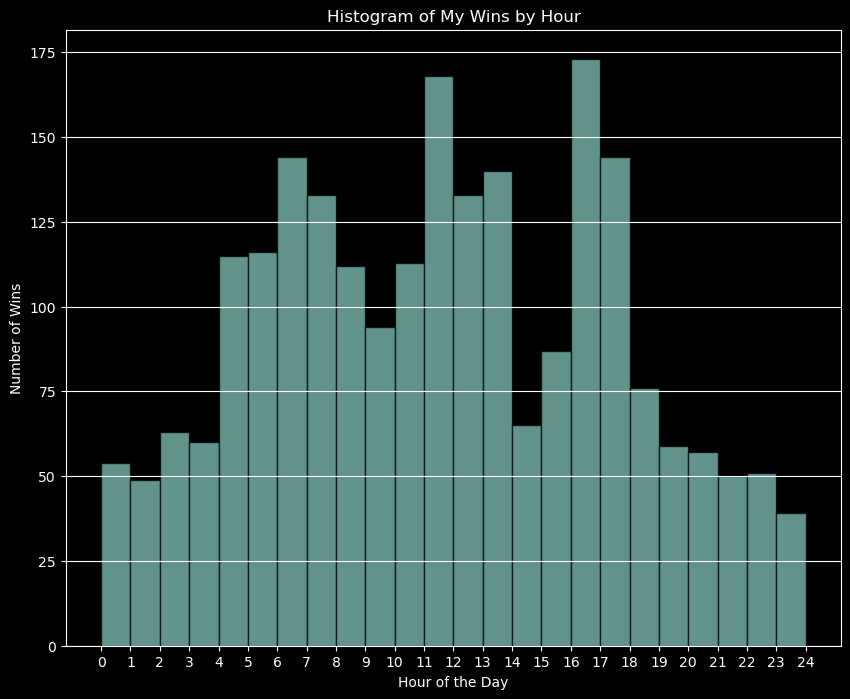

In [65]:
my_wins = df[((df['White'] == '{userrname}') & (df['Result'] == '1-0')) | 
             ((df['Black'] == '{userrname}') & (df['Result'] == '0-1'))]

my_wins['Hour'] = my_wins['StartTime'].str.split(':').str[0].astype(int)

plt.figure(figsize=(10, 8))
plt.hist(my_wins['Hour'], bins=24, range=(0,24), edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Wins')
plt.title('Wins by hour of the day')
plt.xticks(range(0,25))
plt.grid(axis='y')
plt.show()

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Round,White,Black,Result,ECO,ECOUrl,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndTime,Moves
0,0,0,2023.08.24,-,zalabesohat,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,670,689,300,yolodudewhat,18:34:25,18:36:54,1. e4 d5 2. exd5 Qxd5 3. Nf3 Qe6+ 4. Be2 Q...
1,1,1,2023.08.24,-,Prempandey67,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,580,703,300,yolodudewhat,18:45:33,18:55:22,1. e4 d5 2. e5 d4 3. Qh5 e6 4. c3 g6 5. Qf...
2,2,2,2023.08.25,-,bboeker,yolodudewhat,1-0,B01,https://www.chess.com/openings/Scandinavian-De...,764,701,300,bboeker,01:08:47,01:14:24,1. e4 d5 2. exd5 Qxd5 3. d4 Qe6+ 4. Qe2 Qb...
3,3,3,2023.08.25,-,sevag777,yolodudewhat,0-1,A01,https://www.chess.com/openings/Nimzowitsch-Lar...,694,720,300,yolodudewhat,03:50:28,03:56:59,1. b3 d5 2. Bb2 a5 3. e3 e6 4. Bb5+ c6 5. ...
4,4,4,2023.08.25,-,walker086,yolodudewhat,0-1,A40,https://www.chess.com/openings/Englund-Gambit-...,732,729,300,yolodudewhat,17:51:26,17:56:38,1. d4 e5 2. dxe5 d5 3. Nf3 d4 4. Nxd4 Qh4 ...


In [18]:
# Create a directed graph
G = nx.DiGraph()

for _, row in df.iterrows():
    moves = row['Moves'].split()
    # Remove move numbers (like '1.', '2.', ...)
    moves = [move for move in moves if not '.' in move]
    
    for i in range(0, len(moves)-1, 2):  # Take pairs e.g., e4 d5
        white_move = moves[i]
        black_move = moves[i+1]
        
        # Add nodes and edges for white and black moves
        G.add_edge(white_move, black_move)

# Visualize using pyvis
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("chess_graph.html")

chess_graph.html


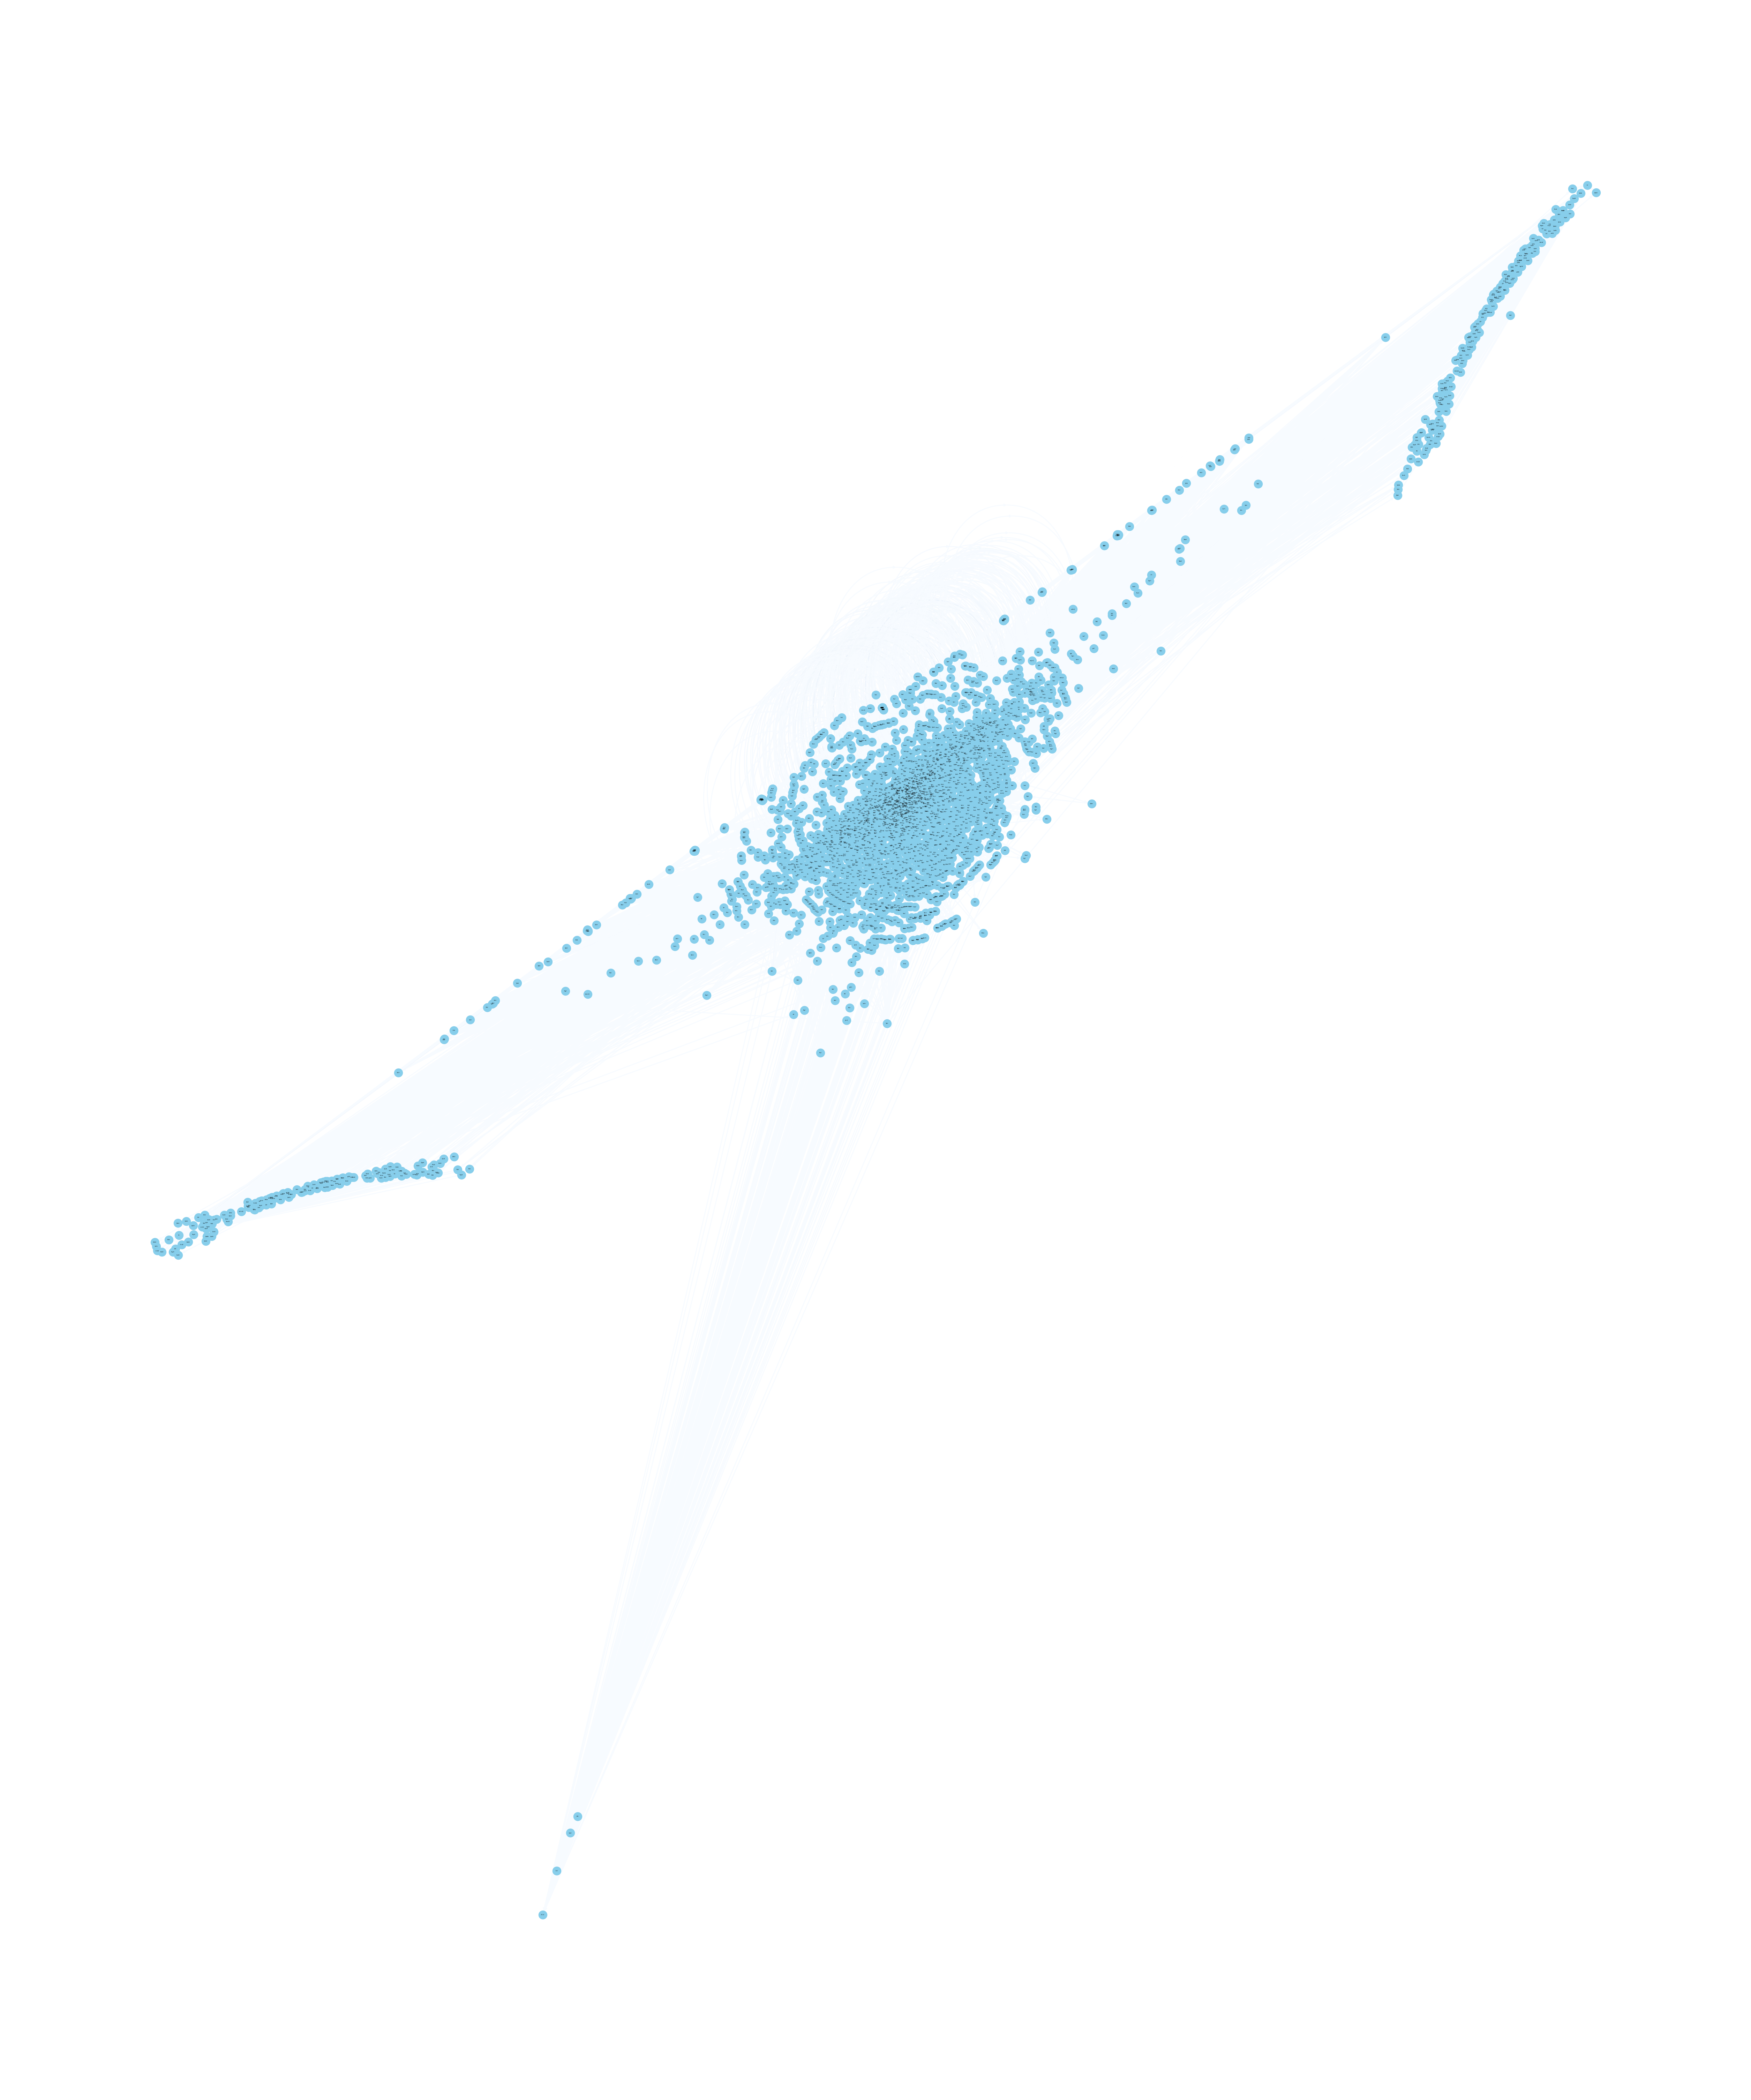

In [25]:
def add_moves_to_graph(G, moves):
    moves = moves.split()
    # Remove move numbers (like '1.', '2.', ...)
    moves = [move for move in moves if not '.' in move]

    # For a single game, create sequential nodes and edges
    for i in range(len(moves) - 1):
        if not G.has_edge(moves[i], moves[i + 1]):
            G.add_edge(moves[i], moves[i + 1], weight=1)
        else:
            # If the move transition already exists, increase the edge weight
            G[moves[i]][moves[i + 1]]['weight'] += 1

    return G

# Initialize an empty directed graph
G = nx.DiGraph()

# Apply the function to each row in 'Moves' column

for _, row in df.iterrows():
    add_moves_to_graph(G, row['Moves'])

# Visualization
plt.figure(figsize=(50, 60))  # Increase image size
pos = nx.spring_layout(G)    # Define the layout
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

# Draw the graph
nx.draw(G, pos, 
        node_color='skyblue', 
        edgelist=edges, 
        edge_color=weights, 
        width=2.0, 
        edge_cmap=plt.cm.Blues, 
        with_labels=True, 
        font_size=2)  # Decrease label text size

plt.show()

In [26]:
def add_moves_to_graph(G, moves):
    moves = moves.split()
    # Remove move numbers (like '1.', '2.', ...)
    moves = [move for move in moves if not '.' in move]

    # For a single game, create sequential nodes and edges
    for i in range(len(moves) - 1):
        if not G.has_edge(moves[i], moves[i + 1]):
            G.add_edge(moves[i], moves[i + 1], weight=1)
        else:
            # If the move transition already exists, increase the edge weight
            G[moves[i]][moves[i + 1]]['weight'] += 1

    return G

# Initialize an empty directed graph
G = nx.DiGraph()

# Apply the function to each row in 'Moves' column

for _, row in df.iterrows():
    add_moves_to_graph(G, row['Moves'])
# Visualization using PyVis
nt = Network(notebook=True, width="100%", height="800px", bgcolor="#ffffff", font_color="black")
nt.from_nx(G)

# Customize node appearance
for node in nt.nodes:
    node["title"] = node["label"]
    node["value"] = 5

# Customize edge appearance
for edge in nt.edges:
    edge["width"] = 0.5

# Show the interactive plot
nt.show("chess_nodes.html")

chess_nodes.html


In [27]:
df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Round,White,Black,Result,ECO,ECOUrl,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndTime,Moves
0,0,0,2023.08.24,-,zalabesohat,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,670,689,300,yolodudewhat,18:34:25,18:36:54,1. e4 d5 2. exd5 Qxd5 3. Nf3 Qe6+ 4. Be2 Q...
1,1,1,2023.08.24,-,Prempandey67,yolodudewhat,0-1,B01,https://www.chess.com/openings/Scandinavian-De...,580,703,300,yolodudewhat,18:45:33,18:55:22,1. e4 d5 2. e5 d4 3. Qh5 e6 4. c3 g6 5. Qf...
2,2,2,2023.08.25,-,bboeker,yolodudewhat,1-0,B01,https://www.chess.com/openings/Scandinavian-De...,764,701,300,bboeker,01:08:47,01:14:24,1. e4 d5 2. exd5 Qxd5 3. d4 Qe6+ 4. Qe2 Qb...
3,3,3,2023.08.25,-,sevag777,yolodudewhat,0-1,A01,https://www.chess.com/openings/Nimzowitsch-Lar...,694,720,300,yolodudewhat,03:50:28,03:56:59,1. b3 d5 2. Bb2 a5 3. e3 e6 4. Bb5+ c6 5. ...
4,4,4,2023.08.25,-,walker086,yolodudewhat,0-1,A40,https://www.chess.com/openings/Englund-Gambit-...,732,729,300,yolodudewhat,17:51:26,17:56:38,1. d4 e5 2. dxe5 d5 3. Nf3 d4 4. Nxd4 Qh4 ...


In [21]:
def process_chess_moves(moves_str, graph):
    # Splitting the moves from the game result.
    moves_parts = moves_str.rsplit(' ', 1)
    
    # If there's a game result, storing it.
    game_result = moves_parts[1] if len(moves_parts) > 1 else None
    
    # Removing move numbers and split the moves string.
    moves = re.sub(r'\d+\.', '', moves_parts[0]).split()
    
    # Appending game result to the moves list
    if game_result:
        moves.append(game_result)
    
    for i in range(len(moves) - 1):
        # Checking if the nodes already exist, if not, initialize with size 1
        if moves[i] not in graph:
            graph.add_node(moves[i], size=1)
        else:
            graph.nodes[moves[i]]['size'] += 1*10

        if moves[i+1] not in graph:
            graph.add_node(moves[i+1], size=1)
        else:
            graph.nodes[moves[i+1]]['size'] += 1*10

        # Adding edge between the nodes
        graph.add_edge(moves[i], moves[i+1])

In [22]:
G = nx.Graph()

# testing
games = [
    '1. e4  d5 2. exd5  Qxd5 3. Nf3  Qe6+ 4. Be2  Qg6 5. Rg1  Bf5 6. d4  Bxc2 7. Qd2  e6 8. Nc3  a5 9. Ne5  Qf5 10. Bd3  Bxd3 11. Nxd3  c6 12. Qe2  b5 13. Be3  b4 14. Nb5  Na6 15. Nd6+ 0-1'
]

for game in games:
    process_chess_moves(game, G)
    
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("chess_moves_graph.html")

chess_moves_graph.html


In [99]:
my_white_games = df[(df['White'] == '{userrname}') & (df['Termination'] == '{userrname}') & (df['Moves'].str.split().str.len() / 2 < 35)]

In [103]:
def adjust_visuals(nt, graph):
    max_size = max([data['size'] for node, data in graph.nodes(data=True)])
    
    for node in nt.nodes:
        size = graph.nodes[node["id"]]['size']
        node_color = plt.cm.Blues(size / max_size)
        node["value"] = size
        node["color"] = node_color
        node["font"] = {
            "color": "black",  # Font color
            "size": 6,  # Font size
            "face": "arial",  # Font type
            "vadjust": 0  # Adjust position
        }
    return nt

def set_stable_physics(nt):
    physics_opts = {
        "stabilization": True,
        "barnesHut": {
            "gravitationalConstant": -30000,
            "centralGravity": 0.3,
            "springLength": 95,
            "springConstant": 0.04,
            "damping": 0.09,
            "avoidOverlap": 0.1
        },
        "maxVelocity": 20,
        "minVelocity": 0.1,
        "solver": "barnesHut",
        "adaptiveTimestep": True
    }
    nt.options = {
        'physics': physics_opts
    }

G = nx.Graph()

for _, row in my_white_games.iterrows():
    process_chess_moves(row['Moves'], G)
    
nt = Network(notebook=True, width="100%", height="800px", bgcolor="#ffffff", font_color="black")
nt.from_nx(G)

# Setting default label font before any other font setting
nt.set_options('''{
    "nodes": {
        "font": {
            "size": 6
        }
    }
}''')

adjust_visuals(nt, G)
set_stable_physics(nt)
nt.show("white_moves_network.html")

white_moves_network.html


In [113]:
F = nx.Graph()

F.add_edges_from([(1,2), (2,3), (2,4), (3,4)])

scale=10 # Scaling the size of the nodes by 10*degree
d = dict(F.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(F,d,'size')

F2 = Network(notebook=True, height="800px", width="100%", font_color="black", directed=True)
F2.from_nx(F)

F2.show("tryout_map.html")

tryout_map.html


In [129]:
N = nx.Graph()
N.add_edges_from(main_list)
scale=10 # Scaling the size of the nodes by 10*degree
d = dict(N.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(N,d,'size')

N2 = Network(notebook=True, height="1600px", width="100%", font_color="black", directed=True)
N2.from_nx(N)

N2.show("better_map.html")

better_map.html


In [19]:
main_list = []
my_white_games = df[(df['White'] == '{userrname}') & (df['Termination'] == '{userrname}') & (df['Moves'].str.split().str.len() / 2 < 20)]

def moves_to_tuples(moves_str):
   
    moves = re.sub(r'\d+\.', '', moves_str).split()
    
    return [(moves[i], moves[i+1]) for i in range(0, len(moves)-1, 2)]


my_white_games['Moves'].apply(lambda x: main_list.extend(moves_to_tuples(x)))

N = nx.Graph()
N.add_edges_from(main_list)

scale = 1 
d = dict(N.degree)
node_sizes = {node: scale * degree for node, degree in d.items()}

N2 = Network(notebook=True, height="1600px", width="100%", font_color="black", directed=True)

for node, size in node_sizes.items():
    N2.add_node(node, size=size, mass = 3)

for edge in N.edges():
    N2.add_edge(edge[0], edge[1])

options = {
  "edges": {
    "smooth": {
      "forceDirection": "none"
    }
  },
  "physics": {
    "minVelocity": 0.0
  }
}

options_str = json.dumps(options)
N2.set_options(options_str)

N2.show("chess_map3.html")

better_map3.html


In [31]:
main_list = []
my_black_games = df[(df['Black'] == '{userrname}') & (df['Termination'] == '{userrname}') & (df['Moves'].str.split().str.len() / 2 < 15)]


def moves_to_tuples(moves_str):
    # Remove move numbers
    moves = re.sub(r'\d+\.', '', moves_str).split()
    
    # Create tuples for every 2 moves
    return [(moves[i], moves[i+1]) for i in range(0, len(moves)-1)]


my_black_games['Moves'].apply(lambda x: main_list.extend(moves_to_tuples(x)))


N = nx.Graph()
N.add_edges_from(main_list)

# Calculate node sizes based on their degrees
scale = 1  # Scaling the size of the nodes by 10*degree
d = dict(N.degree)
node_sizes = {node: scale * degree for node, degree in d.items()}

N2 = Network(notebook=True, height="1600px", width="100%", font_color="black", directed=True)

# Add nodes and edges to N2 with the calculated sizes
for node, size in node_sizes.items():
    N2.add_node(node, size=size, mass = 3)

for edge in N.edges():
    N2.add_edge(edge[0], edge[1])

options = {
  "edges": {
    "smooth": {
      "forceDirection": "none"
    }
  },
  "physics": {
    "minVelocity": 0.75,
    "solver": "repulsion"
  }
}
# Convert the options dictionary to a JSON string and set it
options_str = json.dumps(options)
N2.set_options(options_str)

N2.show("chess_map4.html")

chess_map4.html


In [43]:
main_list = []
my_black_games = df[(df['Black'] == '{userrname}') & (df['Termination'] == '{userrname}') & (df['Moves'].str.split().str.len() / 2 < 25)]


def blackmoves_to_tuples(moves_str):
    
    moves = re.sub(r'\d+\.', '', moves_str).split()

    return [(moves[i], moves[i+1]) for i in range(0, len(moves)-1)]


my_black_games['Moves'].apply(lambda x: main_list.extend(blackmoves_to_tuples(x)))

N = nx.Graph()
N.add_edges_from(main_list)

scale = 1  
d = dict(N.degree)
node_sizes = {node: scale * degree for node, degree in d.items()}

N2 = Network(notebook=True, height="1600px", width="100%", font_color="black", directed=True)

for node, size in node_sizes.items():
    N2.add_node(node, size=size, mass = 3, color="#9370DB")

for edge in N.edges():
    N2.add_edge(edge[0], edge[1], color="#B0E0E6")

options = {
  "edges": {
    "smooth": {
      "type": "straightCross",
      "forceDirection": "none"
    }
  },
  "physics": {
    "hierarchicalRepulsion": {
      "centralGravity": 0,
        "nodeDistance":900
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  }
}

options_str = json.dumps(options)
N2.set_options(options_str)

N2.show("chess_map5.html")

chess_map5.html


In [53]:
main_list = []
my_black_games = df[(df['Termination'] == '{userrname}') & (df['Moves'].str.split().str.len() / 2 < 25)]


def blackmoves_to_tuples(moves_str):
    
    moves = re.sub(r'\d+\.', '', moves_str).split()

    return [(moves[i], moves[i+1]) for i in range(0, len(moves)-1)]


my_black_games['Moves'].apply(lambda x: main_list.extend(blackmoves_to_tuples(x)))

N = nx.Graph()
N.add_edges_from(main_list)

scale = 1  
d = dict(N.degree)
node_sizes = {node: scale * degree for node, degree in d.items()}

N2 = Network(notebook=True, height="1600px", width="100%", font_color="black", directed=True)

for node, size in node_sizes.items():
    N2.add_node(node, size=size, mass = 3)

for edge in N.edges():
    N2.add_edge(edge[0], edge[1])

options = {
  "edges": {
    "smooth": {
      "type": "straightCross",
      "forceDirection": "none",
      "roundness": 0.8
    }
  },
  "physics": {
    "hierarchicalRepulsion": {
      "centralGravity": 0,
      "nodeDistance":550,
      "avoidOverlap": 1
        
    },
    "minVelocity": 0.75,
    "solver": "hierarchicalRepulsion"
  }
}

options_str = json.dumps(options)
N2.set_options(options_str)

N2.show("hierarchicalRepulsion_map.html")

hierarchicalRepulsion_map.html
